In [2]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Create random lats and lngs combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


625

In [7]:
#import the requests library
import requests

#import the Api key
from config import weather_api_key

In [8]:
#starting URL for weather map api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" +weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | carutapera
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | los llanos de aridane
Processing Record 5 of Set 1 | saint-joseph
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | sonoita
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | hinton
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | llanelli
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | lata
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | port blair
Processing Record 17 of Set 1 | santa maria
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | pontianak
Processing Record 20 of Set 1 | xochihuehuetlan
Processing Record 21 of Set 1 | meulaboh
Processing Record 22 of Set 1 | atuona
Processing R

Processing Record 36 of Set 4 | hobyo
Processing Record 37 of Set 4 | hamilton
Processing Record 38 of Set 4 | winslow
Processing Record 39 of Set 4 | gat
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | general roca
Processing Record 42 of Set 4 | denpasar
Processing Record 43 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 44 of Set 4 | trairi
Processing Record 45 of Set 4 | odweyne
Processing Record 46 of Set 4 | ust-kuyga
Processing Record 47 of Set 4 | pangkalanbuun
Processing Record 48 of Set 4 | bandarbeyla
Processing Record 49 of Set 4 | kaduy
Processing Record 50 of Set 4 | guarapari
Processing Record 1 of Set 5 | radis
Processing Record 2 of Set 5 | fort-shevchenko
Processing Record 3 of Set 5 | bereda
Processing Record 4 of Set 5 | peniche
Processing Record 5 of Set 5 | ust-nera
Processing Record 6 of Set 5 | nanganga
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | whitehorse
Processing Record 9 of S

Processing Record 25 of Set 8 | laon
Processing Record 26 of Set 8 | la libertad
Processing Record 27 of Set 8 | pisco
Processing Record 28 of Set 8 | worthing
Processing Record 29 of Set 8 | chipiona
Processing Record 30 of Set 8 | daru
Processing Record 31 of Set 8 | karpathos
Processing Record 32 of Set 8 | cheremukhovo
Processing Record 33 of Set 8 | zhigansk
Processing Record 34 of Set 8 | comodoro rivadavia
Processing Record 35 of Set 8 | christiansburg
Processing Record 36 of Set 8 | porto novo
Processing Record 37 of Set 8 | samfya
Processing Record 38 of Set 8 | ulverstone
Processing Record 39 of Set 8 | santa cruz
Processing Record 40 of Set 8 | qui nhon
Processing Record 41 of Set 8 | kavieng
Processing Record 42 of Set 8 | koumra
Processing Record 43 of Set 8 | mezen
Processing Record 44 of Set 8 | muzhi
Processing Record 45 of Set 8 | camana
Processing Record 46 of Set 8 | moron
Processing Record 47 of Set 8 | jamsa
Processing Record 48 of Set 8 | tabou
Processing Record 4

Processing Record 16 of Set 12 | el playon
Processing Record 17 of Set 12 | nueva concepcion
Processing Record 18 of Set 12 | kwekwe
Processing Record 19 of Set 12 | macapa
Processing Record 20 of Set 12 | molina
Processing Record 21 of Set 12 | salto
Processing Record 22 of Set 12 | pervomayskiy
Processing Record 23 of Set 12 | bodden town
Processing Record 24 of Set 12 | saint-francois
Processing Record 25 of Set 12 | yarkovo
Processing Record 26 of Set 12 | nilombot
Processing Record 27 of Set 12 | ahipara
Processing Record 28 of Set 12 | zhezkazgan
Processing Record 29 of Set 12 | menongue
Processing Record 30 of Set 12 | quebo
Processing Record 31 of Set 12 | geraldton
Processing Record 32 of Set 12 | karamea
City not found. Skipping...
Processing Record 33 of Set 12 | mayumba
Processing Record 34 of Set 12 | strelka
Processing Record 35 of Set 12 | moranbah
Processing Record 36 of Set 12 | bathsheba
Processing Record 37 of Set 12 | mwinilunga
Processing Record 38 of Set 12 | capo

In [ ]:
len(city_data)

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manado,1.4870,124.8455,90.37,58,20,3.44,ID,2022-01-26 01:35:13
1,Esperance,-33.8667,121.9000,69.64,75,89,13.33,AU,2022-01-26 01:35:14
2,Sinnamary,5.3833,-52.9500,76.23,87,71,9.06,GF,2022-01-26 01:35:14
3,Arraial Do Cabo,-22.9661,-42.0278,75.72,90,0,17.85,BR,2022-01-26 01:34:39
4,Mar Del Plata,-38.0023,-57.5575,76.08,98,100,11.01,AR,2022-01-26 01:31:46
5,Burnie,-41.0667,145.9167,74.95,65,41,12.44,AU,2022-01-26 01:35:15
6,Bolobo,-2.1667,16.2333,72.34,91,99,3.74,CD,2022-01-26 01:35:15
7,Kodiak,57.7900,-152.4072,31.51,51,0,8.05,US,2022-01-26 01:35:16
8,Jamestown,42.0970,-79.2353,18.72,85,100,5.75,US,2022-01-26 01:32:35
9,Shimoda,34.6667,138.9500,46.76,73,100,6.42,JP,2022-01-26 01:35:16


In [42]:
new_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_city_data]
new_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Manado,ID,2022-01-26 01:35:13,1.4870,124.8455,90.37,58,20,3.44
1,Esperance,AU,2022-01-26 01:35:14,-33.8667,121.9000,69.64,75,89,13.33
2,Sinnamary,GF,2022-01-26 01:35:14,5.3833,-52.9500,76.23,87,71,9.06
3,Arraial Do Cabo,BR,2022-01-26 01:34:39,-22.9661,-42.0278,75.72,90,0,17.85
4,Mar Del Plata,AR,2022-01-26 01:31:46,-38.0023,-57.5575,76.08,98,100,11.01
...,...,...,...,...,...,...,...,...,...
563,Miyako,JP,2022-01-26 01:51:06,39.6367,141.9525,39.34,54,100,2.30
564,Port Macquarie,AU,2022-01-26 01:47:30,-31.4333,152.9167,73.89,71,99,7.20
565,Yining,CN,2022-01-26 01:51:07,29.0361,114.5636,43.48,97,100,2.17
566,Uruzgan,AF,2022-01-26 01:51:07,32.8333,66.0000,22.75,49,0,9.15


In [43]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df[]
wind_speed = city_data_df["Wind Speed"]

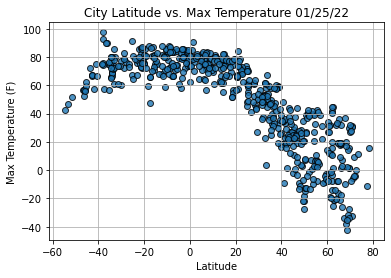

In [45]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

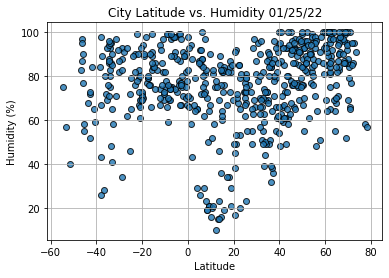

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

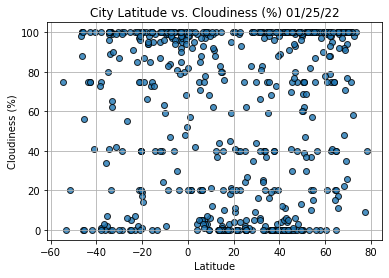

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

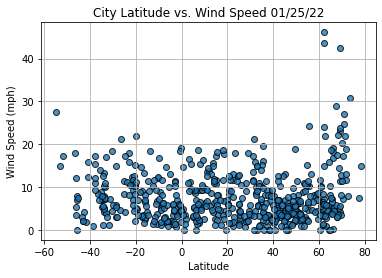

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
index13 = city_data_df.loc[13]

In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


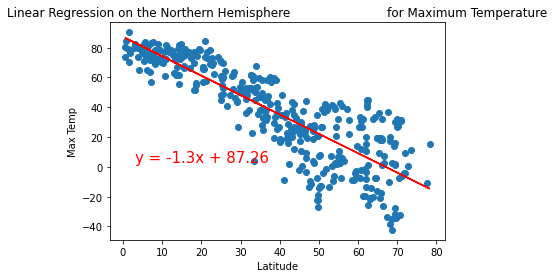

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(3,3))

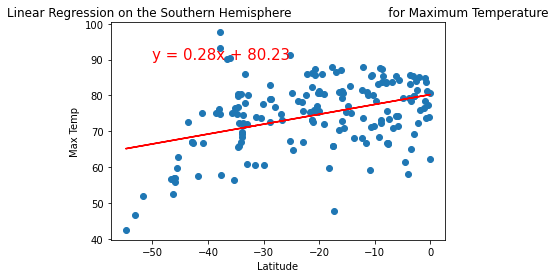

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


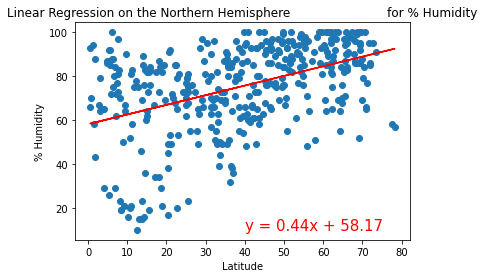

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


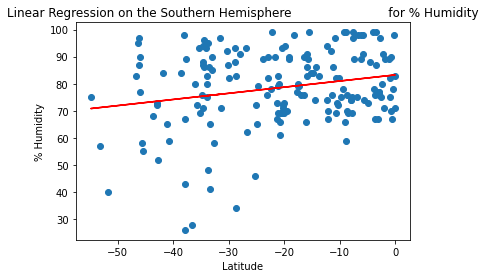

In [66]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

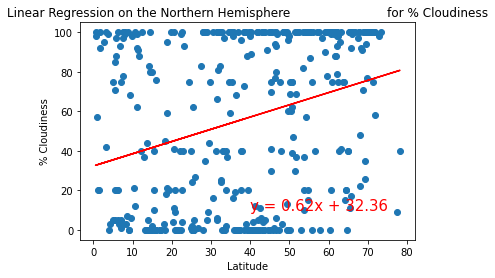

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

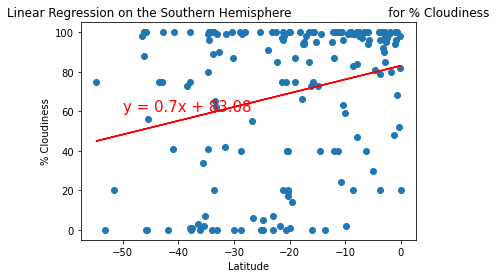

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

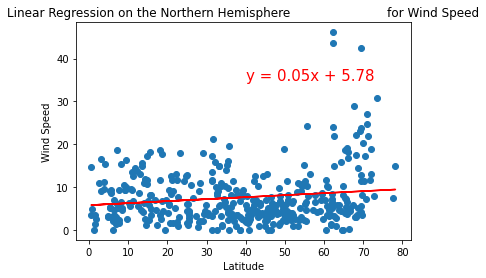

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

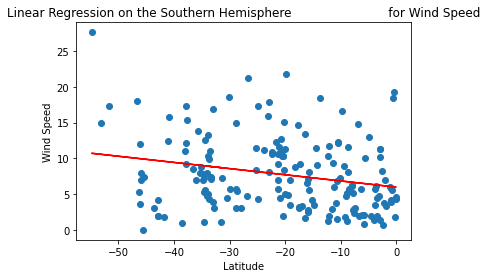

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))